In [1]:
import msprime
import itertools
import random
import math
from IPython.display import SVG

In [2]:
length = 10
recomb_map = msprime.RecombinationMap.uniform_map(length, 0.2, num_loci=length)
ts = msprime.simulate(30, recombination_map=recomb_map)

In [3]:
[b for b in ts.breakpoints()]

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [4]:
mutated_ts = msprime.mutate(ts, rate=1)

In [5]:
print(mutated_ts.tables.sites)
print(mutated_ts.tables.mutations)
print(mutated_ts.tables.edges)

id	position	ancestral_state	metadata
0	0.05378827	0	
1	0.12658111	0	
2	0.48075800	0	
3	0.49099903	0	
4	0.51724632	0	
5	0.89886404	0	
6	1.07572856	0	
7	1.10343360	0	
8	1.13379373	0	
9	1.37444299	0	
10	1.47932565	0	
11	1.49223805	0	
12	1.62819417	0	
13	1.70397584	0	
14	1.73931234	0	
15	1.79078808	0	
16	1.87590530	0	
17	1.90232050	0	
18	1.92804549	0	
19	1.92821204	0	
20	1.94078748	0	
21	2.13001264	0	
22	2.50564680	0	
23	2.58926091	0	
24	2.77834380	0	
25	2.91721802	0	
26	2.93457466	0	
27	2.98538614	0	
28	3.02676023	0	
29	3.11334630	0	
30	3.22104760	0	
31	3.60451949	0	
32	3.68689120	0	
33	3.78087260	0	
34	3.89856316	0	
35	3.93992291	0	
36	3.95002784	0	
37	3.97724208	0	
38	4.07285788	0	
39	4.20632533	0	
40	4.25133937	0	
41	4.25409055	0	
42	4.30566324	0	
43	4.33520757	0	
44	4.34723523	0	
45	4.36197632	0	
46	4.37783792	0	
47	4.44385943	0	
48	4.67991720	0	
49	4.79020194	0	
50	4.83784600	0	
51	4.90960200	0	
52	4.93425003	0	
53	5.13603447	0	
54	5.16466676	0	
55	5.20508639	0	
56	5.32584800	0	
57	5

In [6]:
tables = mutated_ts.dump_tables()

In [7]:
tables.sites.clear()
tables.mutations.clear()

In [8]:
states = ['a','t','g','c']
random.choice(states)

't'

In [9]:
print(mutated_ts.tables.edges)

id	left		right		parent	child
0	0.00000000	10.00000000	30	15
1	0.00000000	10.00000000	30	24
2	0.00000000	10.00000000	31	10
3	0.00000000	10.00000000	31	28
4	0.00000000	10.00000000	32	12
5	0.00000000	10.00000000	32	30
6	2.00000000	10.00000000	33	5
7	2.00000000	10.00000000	33	6
8	0.00000000	10.00000000	34	2
9	0.00000000	10.00000000	34	20
10	0.00000000	10.00000000	35	13
11	0.00000000	10.00000000	35	27
12	0.00000000	10.00000000	36	11
13	0.00000000	10.00000000	36	22
14	0.00000000	10.00000000	37	17
15	0.00000000	10.00000000	37	19
16	0.00000000	10.00000000	38	0
17	0.00000000	10.00000000	38	36
18	0.00000000	10.00000000	39	18
19	0.00000000	10.00000000	39	35
20	0.00000000	10.00000000	40	4
21	0.00000000	10.00000000	40	37
22	0.00000000	10.00000000	41	7
23	0.00000000	10.00000000	41	8
24	0.00000000	10.00000000	42	1
25	0.00000000	10.00000000	42	23
26	0.00000000	2.00000000	43	5
27	0.00000000	10.00000000	43	29
28	2.00000000	10.00000000	43	33
29	7.00000000	10.00000000	44	21
30	7.00000000	10.00000000	44	26

In [10]:
for k, g in itertools.groupby(mutated_ts.sites(), lambda x: math.floor(x.position)):
  print("Sites at position {}".format(k))
  site_id = tables.sites.add_row(k, random.choice(states))
  mutations = []
  for site in g:
    print(k)
    tree = mutated_ts.at(k)
    mutations.extend(site.mutations)
  mutations.sort(key = lambda x: mutated_ts.node(x.node).time, reverse=True)
  print("\n --> ".join(["{}: {}".format(mutated_ts.node(m.node).time, m) for m in mutations]))
    
  for m in mutations:
    tables.mutations.add_row(site_id, m.node, random.choice(states), parent=-1)
    #print('row added')
    

Sites at position 0
0
0
0
0
0
0
0.8656747874611778: {'id': 3, 'site': 3, 'node': 61, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.42899700076805086: {'id': 4, 'site': 4, 'node': 55, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.23344910234719884: {'id': 0, 'site': 0, 'node': 52, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.0: {'id': 1, 'site': 1, 'node': 3, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.0: {'id': 2, 'site': 2, 'node': 25, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 0.0: {'id': 5, 'site': 5, 'node': 3, 'derived_state': '1', 'parent': -1, 'metadata': b''}
Sites at position 1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.3514508793109647: {'id': 7, 'site': 7, 'node': 64, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 1.3514508793109647: {'id': 10, 'site': 10, 'node': 64, 'derived_state': '1', 'parent': -1, 'metadata': b''}
 --> 1.3514508793109647: {'id': 12, 'site': 12, 'node': 64, 'derived_state': '1', '

In [11]:
print(tables.mutations)

id	site	node	derived_state	parent	metadata
0	0	61	g	-1	
1	0	55	t	-1	
2	0	52	a	-1	
3	0	3	g	-1	
4	0	25	c	-1	
5	0	3	a	-1	
6	1	64	g	-1	
7	1	64	g	-1	
8	1	64	a	-1	
9	1	61	a	-1	
10	1	40	a	-1	
11	1	32	a	-1	
12	1	32	a	-1	
13	1	32	c	-1	
14	1	32	t	-1	
15	1	32	g	-1	
16	1	8	a	-1	
17	1	7	t	-1	
18	1	18	t	-1	
19	1	6	a	-1	
20	1	3	c	-1	
21	2	64	g	-1	
22	2	64	g	-1	
23	2	49	a	-1	
24	2	40	c	-1	
25	2	25	g	-1	
26	2	3	g	-1	
27	2	26	t	-1	
28	3	64	a	-1	
29	3	61	g	-1	
30	3	61	a	-1	
31	3	40	a	-1	
32	3	40	a	-1	
33	3	40	c	-1	
34	3	32	a	-1	
35	3	32	t	-1	
36	3	31	g	-1	
37	3	25	c	-1	
38	4	64	c	-1	
39	4	64	g	-1	
40	4	55	t	-1	
41	4	52	c	-1	
42	4	49	g	-1	
43	4	43	t	-1	
44	4	38	t	-1	
45	4	34	t	-1	
46	4	32	c	-1	
47	4	32	t	-1	
48	4	31	g	-1	
49	4	25	t	-1	
50	4	16	a	-1	
51	4	14	a	-1	
52	4	3	c	-1	
53	5	55	g	-1	
54	5	54	t	-1	
55	5	49	c	-1	
56	5	40	t	-1	
57	5	40	c	-1	
58	5	32	t	-1	
59	5	3	c	-1	
60	5	3	t	-1	
61	5	26	c	-1	
62	6	52	t	-1	
63	6	52	g	-1	
64	6	51	a	-1	
65	6	40	a	-1	
66	6	33	g	-1	
67	6	32	a	-1	
68	6	32	c	-1	
69	6	31	a	-

In [12]:
tables.compute_mutation_parents()

In [13]:
print(tables.mutations)

id	site	node	derived_state	parent	metadata
0	0	61	g	-1	
1	0	55	t	0	
2	0	52	a	-1	
3	0	3	g	1	
4	0	25	c	-1	
5	0	3	a	3	
6	1	64	g	-1	
7	1	64	g	6	
8	1	64	a	7	
9	1	61	a	-1	
10	1	40	a	9	
11	1	32	a	8	
12	1	32	a	11	
13	1	32	c	12	
14	1	32	t	13	
15	1	32	g	14	
16	1	8	a	8	
17	1	7	t	8	
18	1	18	t	9	
19	1	6	a	8	
20	1	3	c	9	
21	2	64	g	-1	
22	2	64	g	21	
23	2	49	a	-1	
24	2	40	c	-1	
25	2	25	g	22	
26	2	3	g	-1	
27	2	26	t	22	
28	3	64	a	-1	
29	3	61	g	-1	
30	3	61	a	29	
31	3	40	a	30	
32	3	40	a	31	
33	3	40	c	32	
34	3	32	a	28	
35	3	32	t	34	
36	3	31	g	30	
37	3	25	c	30	
38	4	64	c	-1	
39	4	64	g	38	
40	4	55	t	-1	
41	4	52	c	39	
42	4	49	g	-1	
43	4	43	t	41	
44	4	38	t	41	
45	4	34	t	42	
46	4	32	c	39	
47	4	32	t	46	
48	4	31	g	-1	
49	4	25	t	-1	
50	4	16	a	42	
51	4	14	a	-1	
52	4	3	c	40	
53	5	55	g	-1	
54	5	54	t	-1	
55	5	49	c	-1	
56	5	40	t	-1	
57	5	40	c	56	
58	5	32	t	-1	
59	5	3	c	53	
60	5	3	t	59	
61	5	26	c	54	
62	6	52	t	-1	
63	6	52	g	62	
64	6	51	a	-1	
65	6	40	a	-1	
66	6	33	g	63	
67	6	32	a	-1	
68	6	32	c	67	
69	6	31	a	64	
70	6	26	g

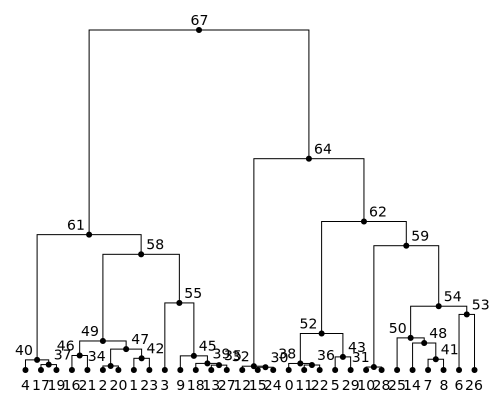

Tree 0 covers [0.00, 2.00); TMRCA = 2.1745
0.0928224502404524


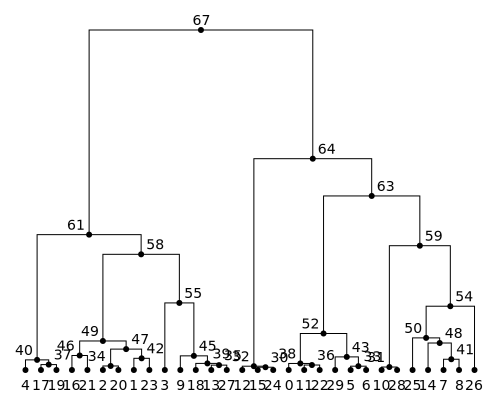

Tree 1 covers [2.00, 3.00); TMRCA = 2.1745
0.0928224502404524


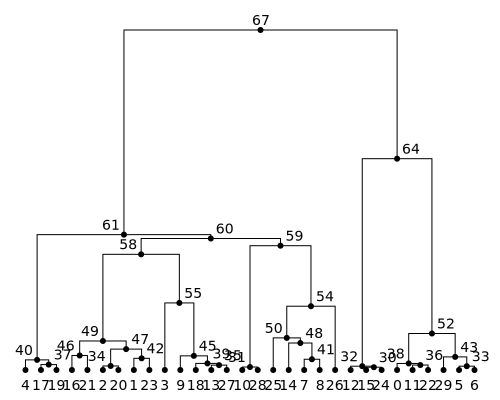

Tree 2 covers [3.00, 4.00); TMRCA = 2.1745
0.0928224502404524


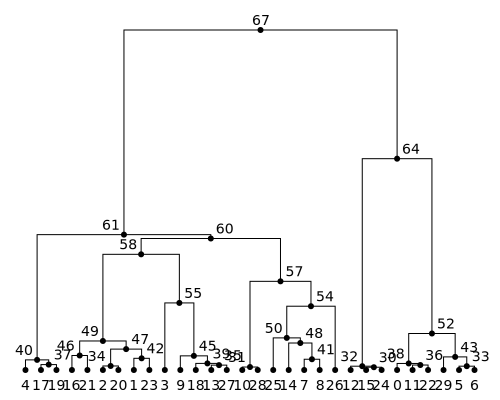

Tree 3 covers [4.00, 5.00); TMRCA = 2.1745
0.0928224502404524


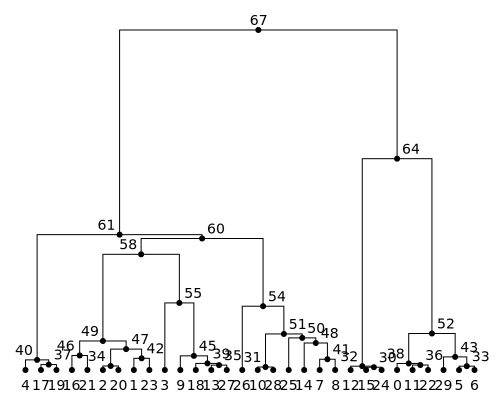

Tree 4 covers [5.00, 6.00); TMRCA = 2.1745
0.0928224502404524


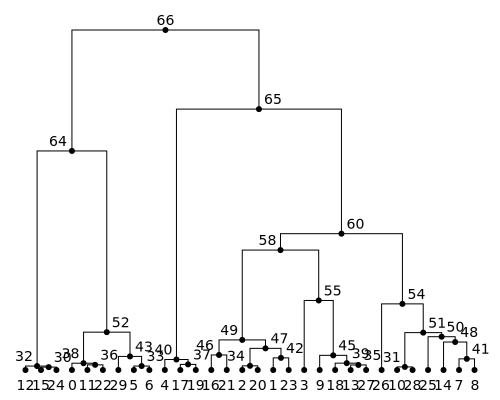

Tree 5 covers [6.00, 7.00); TMRCA = 2.0977
0.0928224502404524


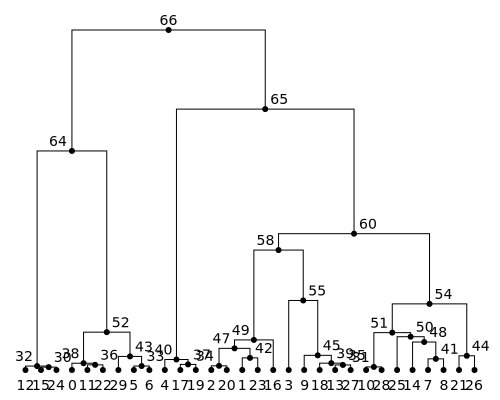

Tree 6 covers [7.00, 8.00); TMRCA = 2.0977
0


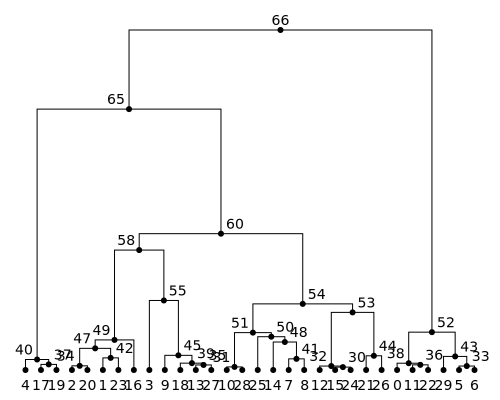

Tree 7 covers [8.00, 9.00); TMRCA = 2.0977
0


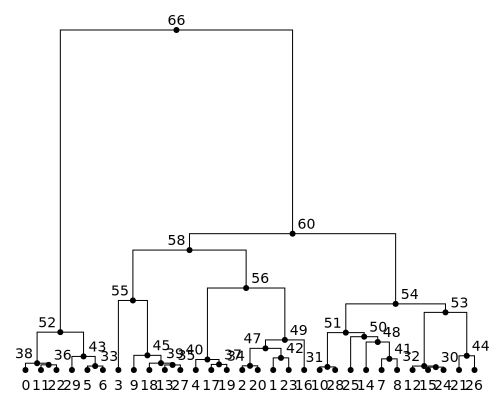

Tree 8 covers [9.00, 10.00); TMRCA = 2.0977
0


In [17]:
for tree in ts.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))

In [14]:
mutated_ts_trees = tables.tree_sequence()

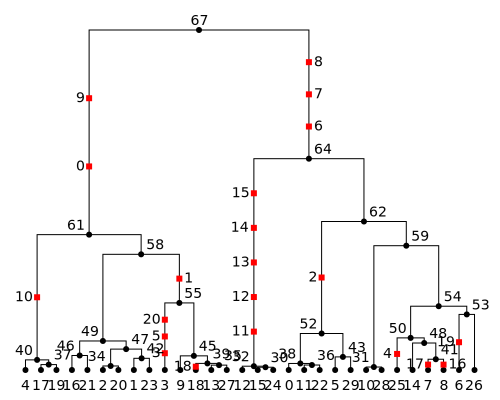

Tree 0 covers [0.00, 2.00); TMRCA = 2.1745
0.0928224502404524


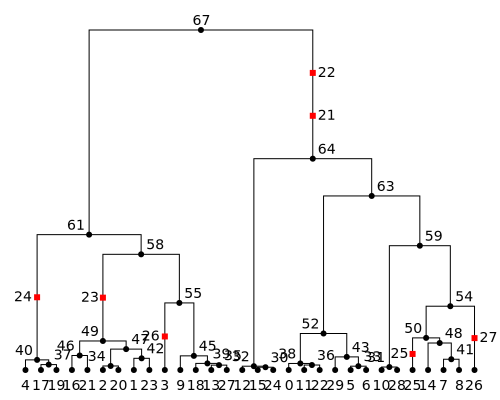

Tree 1 covers [2.00, 3.00); TMRCA = 2.1745
0.0928224502404524


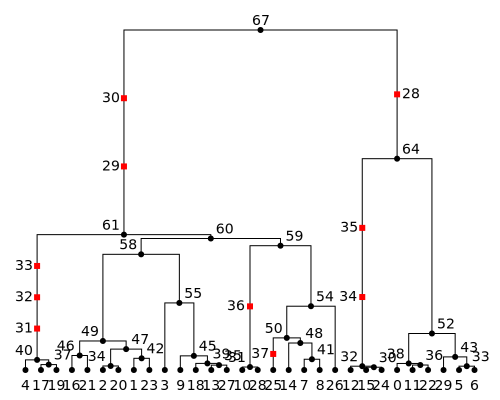

Tree 2 covers [3.00, 4.00); TMRCA = 2.1745
0.0928224502404524


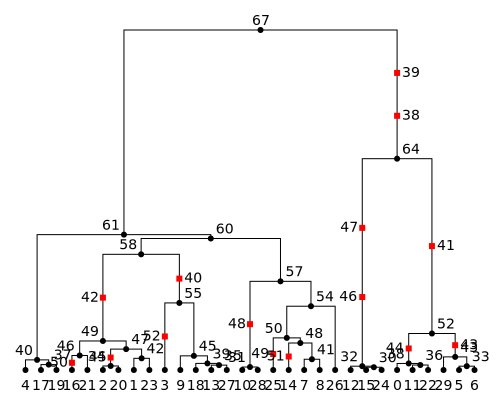

Tree 3 covers [4.00, 5.00); TMRCA = 2.1745
0.0928224502404524


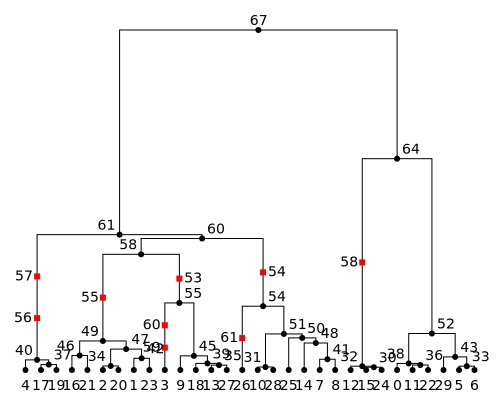

Tree 4 covers [5.00, 6.00); TMRCA = 2.1745
0.0928224502404524


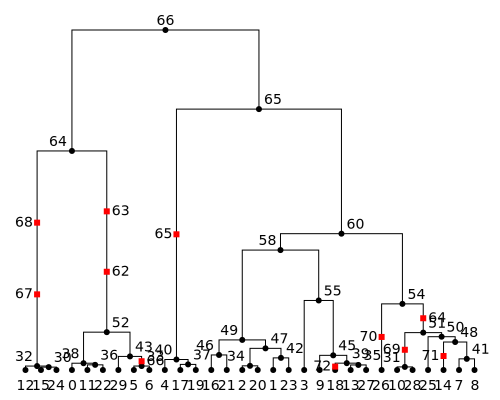

Tree 5 covers [6.00, 7.00); TMRCA = 2.0977
0.0928224502404524


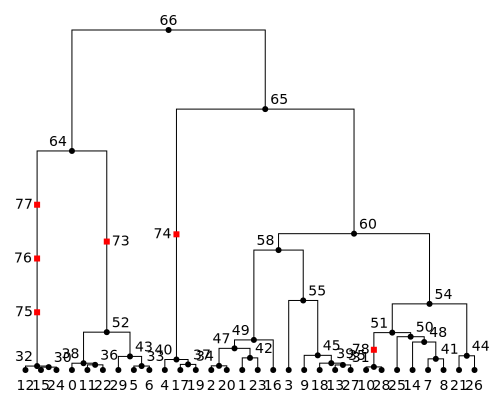

Tree 6 covers [7.00, 8.00); TMRCA = 2.0977
0


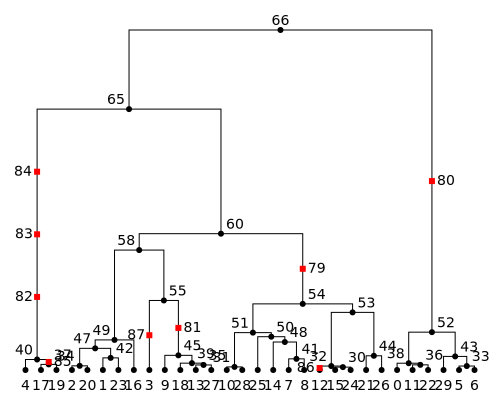

Tree 7 covers [8.00, 9.00); TMRCA = 2.0977
0


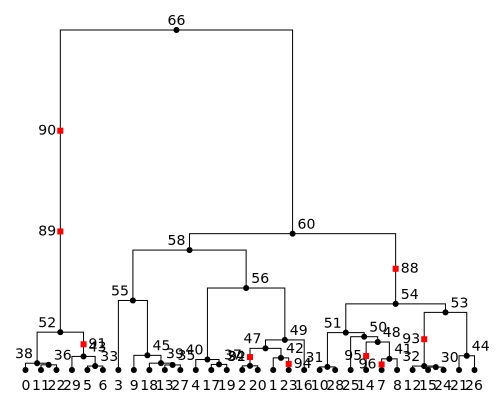

Tree 8 covers [9.00, 10.00); TMRCA = 2.0977
0


In [15]:
for tree in mutated_ts_trees.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))

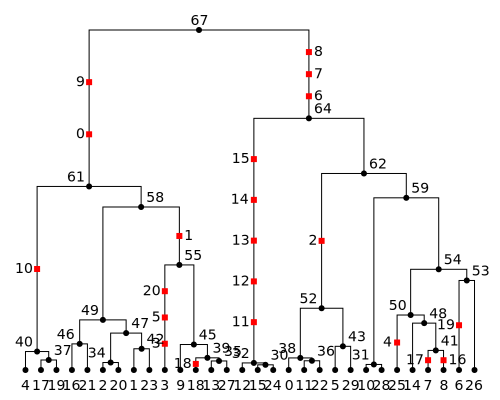

Tree 0 covers [0.00, 2.00); TMRCA = 2.1745
0.0928224502404524


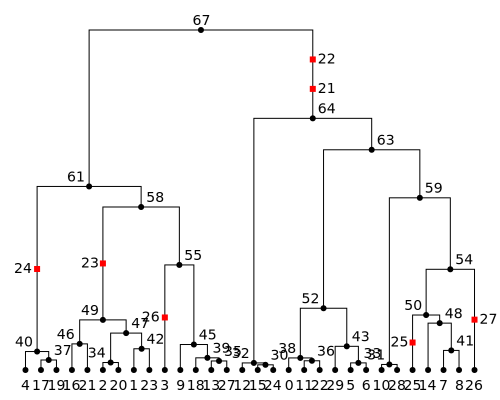

Tree 1 covers [2.00, 3.00); TMRCA = 2.1745
0.0928224502404524


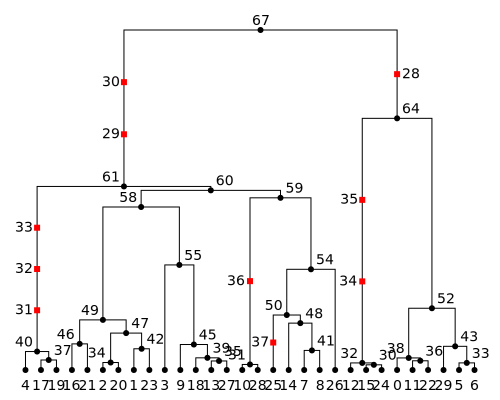

Tree 2 covers [3.00, 4.00); TMRCA = 2.1745
0.0928224502404524


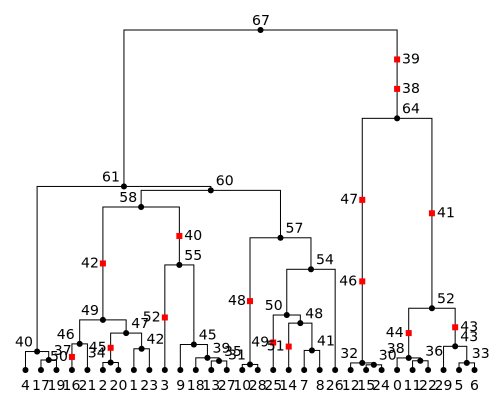

Tree 3 covers [4.00, 5.00); TMRCA = 2.1745
0.0928224502404524


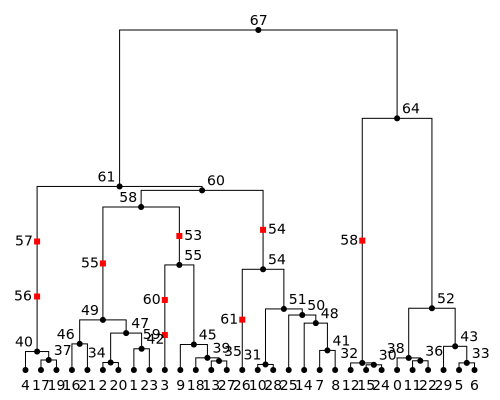

Tree 4 covers [5.00, 6.00); TMRCA = 2.1745
0.0928224502404524


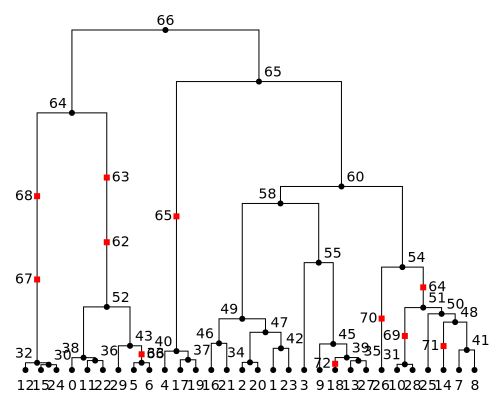

Tree 5 covers [6.00, 7.00); TMRCA = 2.0977
0.0928224502404524


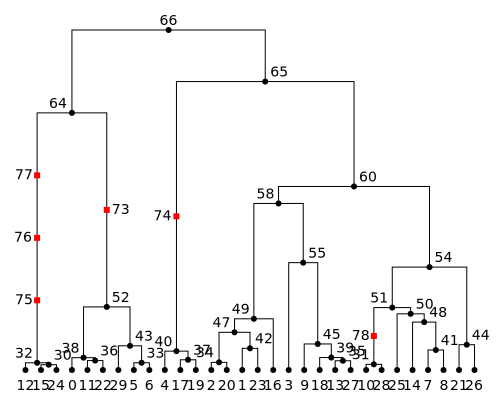

Tree 6 covers [7.00, 8.00); TMRCA = 2.0977
0


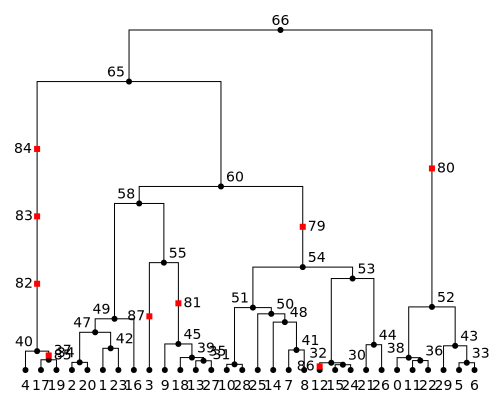

Tree 7 covers [8.00, 9.00); TMRCA = 2.0977
0


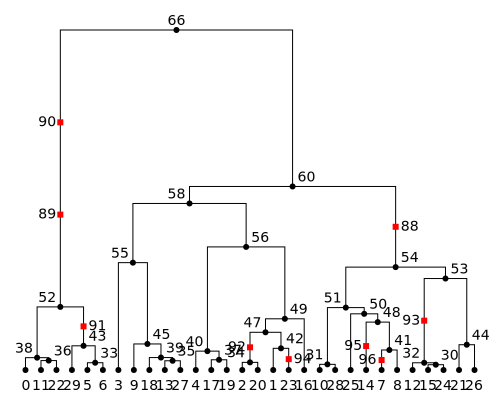

Tree 8 covers [9.00, 10.00); TMRCA = 2.0977
0


In [16]:
for tree in mutated_ts_trees.trees():
    display(SVG(tree.draw(height=400, width = 500, 
                            tree_height_scale="log_time")))
    print("Tree {} covers [{:.2f}, {:.2f}); TMRCA = {:.4f}".format(
        tree.index, *tree.interval, tree.time(tree.roots[0])))
    print(tree.branch_length(46))